In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

tratamiento = pd.DataFrame({"Tipo de tratamiento" : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                     0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                     1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                     1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],

                            "Precio" : [11.5,22.5,1.4,10.5,42.5,20,22.5,15,119,42.5,15,12.5,19.5,13,4,5,30,64,40,30,
                                        82,145,54,50,284,52,20,30,14,155,60,65,72,80,185,91.5,245,175,45,20,30,14,
                                        155,60,65,72,80,185,91.5,245,175,45,51,112,114,132,167,116,159,243,128,532,
                                        448,538,653,986,604,705,401,194,495,207,12,68,64,30,57,92,793.8,1831.02,
                                        807.91,111.99,57.59,467.62,396.65,311.58,178.11,105,320.25,201.6,714,428,
                                        271.2,682.88,242,498,222,48,40,112,98,101,66,208,121,92,48,677,362,546,346,
                                        405,258,316,641,362,405,257,588,908,564,671,517,669,414,677,666,426,282,213,
                                        238,145,269,262,167,211,584.5,1111,667,718,496,604,448,567,584,976,590,698,410]})
tratamiento

,Tipo de tratamiento,Precio
0,0,11.5
1,0,22.5
2,0,1.4
3,0,10.5
4,0,42.5
...,...,...
144,1,584.0
145,1,976.0
146,1,590.0
147,1,698.0


In [ ]:
escalador = MinMaxScaler().fit(tratamiento.values)

tratamiento = pd.DataFrame(escalador.transform(tratamiento.values),
                           columns=["Tipo de tratamiento", "Precio"])
kmeans = KMeans(n_clusters=4).fit(tratamiento.values)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2,
       3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3,
       3, 3, 0, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3], dtype=int32)

In [ ]:
tratamiento["cluster"] = kmeans.labels_
tratamiento

,Tipo de tratamiento,Precio,cluster
0,0.0,0.005520,1
1,0.0,0.011532,1
2,0.0,0.000000,1
3,0.0,0.004974,1
4,0.0,0.022464,1
...,...,...,...
144,1.0,0.318427,3
145,1.0,0.532679,2
146,1.0,0.321706,3
147,1.0,0.380735,2


In [ ]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[1.00000000e+00 7.90509019e-02]
 [7.77156117e-16 3.79397824e-02]
 [1.00000000e+00 4.43387425e-01]
 [1.00000000e+00 2.55001722e-01]] 0.6594145851136975


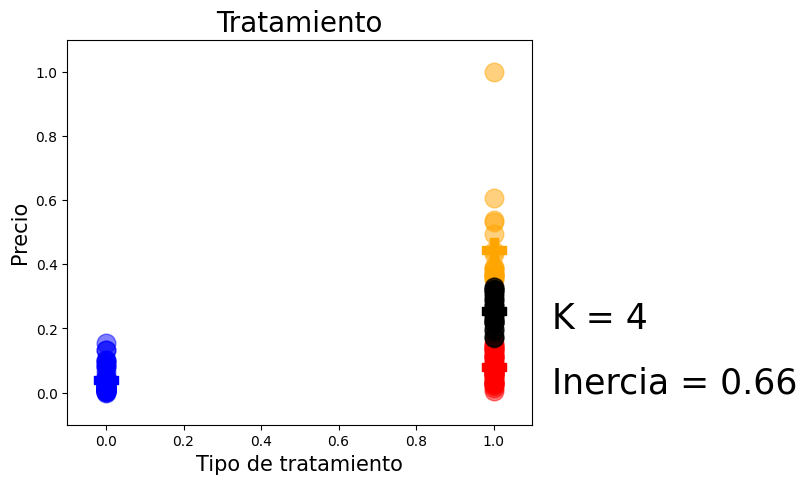

In [ ]:
plt.figure(figsize=(6,5), dpi=100)
colores = ["red","blue","orange","black","purple","pink","brown"]

for cluster in range(kmeans.n_clusters):
  plt.scatter(tratamiento[tratamiento["cluster"] == cluster]["Tipo de tratamiento"],
              tratamiento[tratamiento["cluster"] == cluster]["Precio"],
              marker="o", s=180, color=colores[cluster], alpha=0.5)
  plt.scatter(kmeans.cluster_centers_[cluster][0],
              kmeans.cluster_centers_[cluster][1],
              marker="P", s=280, color=colores[cluster])

plt.title("Tratamiento", fontsize=20)
plt.xlabel("Tipo de tratamiento", fontsize=15)
plt.ylabel("Precio", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

del tratamiento["cluster"]

In [83]:
print(tratamiento.describe())

       Tipo de tratamiento      Precio
count           149.000000  149.000000
mean              0.651007    0.151396
std               0.478259    0.156243
min               0.000000    0.000000
25%               0.000000    0.032029
50%               1.000000    0.094883
75%               1.000000    0.244094
max               1.000000    1.000000
